<a href="https://colab.research.google.com/github/SaiAkshay24/Fmml-Python/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Counting for Representation

### Lab Coordinator: Shreeya Pahune

**Embedding methods** (alternatively referred to as “encoding”, “vectorising”, etc) convert symbolic representations (i.e. words, emojis, categorical items, dates, times, other features, etc) into meaningful numbers (i.e. real numbers that capture underlying semantic relations between the symbols).

**one-hot encoding**

If we wanted to embed a colour like “orange”, we could have a long vector wherein vector values correspond to the various colours of the rainbow.

The location corresponding to the colour being embedded could be given the value “1” while all other values would be set to “0”. This is one of the simplest embedding methods and is known as one-hot encoding (because only one value in the vector has the value one).


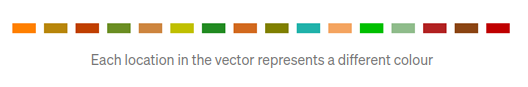

In [ ]:
orange = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

green = [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]

**Feature vectors**

Imagine another type of vector that is able to represent any colour with just three values each time (lets say the values represent red, green and blue).


In [ ]:
red   = [1, 0, 0]
green = [0, 1, 0]

Document Vectors

Features can also be more abstract relations, such as the context in which a word occurs (assuming words with similar contexts must have similar meanings). For instance, if we assume a document is generally on a single topic / theme, then we can safely take that entire document to be an unlabelled feature and generate distributed word vectors using documents as features.

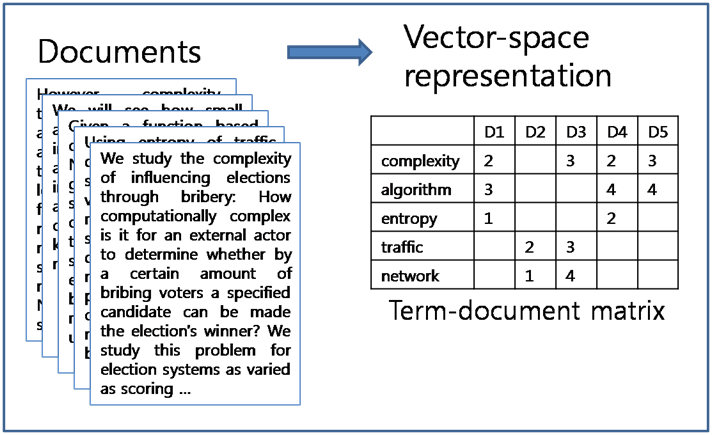

### Data Cleaning and Preprocessing step

Raw text must be processed and converted into a form so that it is suitable to use with various machine-learning algorithms.  
In case of text, there are lots of things that need to be taken into account.  


1.   Removing numbers from the text
2.   Handling capitalization and punctuation.
3.   Stemming and Lemmatizing text.  

And most importantly, one can't just use words or images directly in algorithms; they need to be converted into vectors- a form that algorithms can understand.



In [ ]:
# NLTK (or Natural Language Tool Kit) is a commonly used library for processing text.
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import re
import numpy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup

def cleanText(text, lemmatize, stemmer):
    """Method for cleaning text from train and test data. Removes numbers, punctuation, and capitalization. Stems or lemmatizes text."""

    if isinstance(text, float):
        text = str(text)
    if isinstance(text, numpy.int64):
        text = str(text)
    try:
        text = text.decode()
    except AttributeError:
        pass

    soup = BeautifulSoup(text, "lxml")
    text = soup.get_text()

    text = re.sub(r"[^A-Za-z]", " ", text)
    text = text.lower()


    if lemmatize:
        wordnet_lemmatizer = WordNetLemmatizer()

        def get_tag(tag):
            if tag.startswith('J'):
                return wordnet.ADJ
            elif tag.startswith('V'):
                return wordnet.VERB
            elif tag.startswith('N'):
                return wordnet.NOUN
            elif tag.startswith('R'):
                return wordnet.ADV
            else:
                return ''

        text_result = []
        tokens = word_tokenize(text)  # Generate list of tokens
        tagged = pos_tag(tokens)
        for t in tagged:
            try:
                text_result.append(wordnet_lemmatizer.lemmatize(t[0], get_tag(t[1][:2])))
            except:
                text_result.append(wordnet_lemmatizer.lemmatize(t[0]))
        return text_result

    if stemmer:
        text_result = []
        tokens = word_tokenize(text)
        snowball_stemmer = SnowballStemmer('english')
        for t in tokens:
            text_result.append(snowball_stemmer.stem(t))
        return text_result

In [ ]:
sample_text = "Troubling"
sample_text_result = cleanText(sample_text, lemmatize=False, stemmer=True)
sample_text_result = " ".join(str(x) for x in sample_text_result)
print(sample_text)
print(sample_text_result)
sample_text_result = cleanText(sample_text, lemmatize=True, stemmer=False)
sample_text_result = " ".join(str(x) for x in sample_text_result)
print(sample_text_result)

Troubling
troubl
trouble


### BAG OF WORDS 

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in many ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. 
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [ ]:
# Functions to convert document(s) to a list of words, with the option of removing stopwords. Returns document-term matrix.

def createBagOfWords(train, test, remove_stopwords, lemmatize, stemmer):
    if remove_stopwords:
        vectorizer = CountVectorizer(analyzer='word', input='content', stop_words=stopwords.words('english'))
    else:
        vectorizer = CountVectorizer(analyzer='word', input='content')

    clean_train = []
    for paragraph in train:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_train.append(paragraph)

    clean_test = []
    for paragraph in test:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_test.append(paragraph)

    bag_of_words_train = vectorizer.fit_transform(clean_train).toarray()
    bag_of_words_test = vectorizer.transform(clean_test).toarray()
    return bag_of_words_train, bag_of_words_test


### TF-IDF 
TF-IDF technique is used to find meaning of sentences consisting of words and cancels out the incapabilities of Bag of Words technique which is good for text classification or for helping a machine read words in numbers.

The number of times a term occurs in a document is called its Term frequency (TF).

 Document frequency is the number of documents in which the word is present.  Inverse DF (IDF) is the inverse of the document frequency which measures the informativeness of term *t*. 




In [ ]:
def createTFIDF(train, test, remove_stopwords, lemmatize, stemmer):
    if remove_stopwords:
        vectorizer = TfidfVectorizer(analyzer='word', input='content', stop_words=stopwords.words('english'))
    else:
        vectorizer =  TfidfVectorizer(analyzer='word', input='content')

    clean_train = []
    for paragraph in train:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_train.append(paragraph)

    clean_test = []
    for paragraph in test:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_test.append(paragraph)

    tfidf_train = vectorizer.fit_transform(clean_train).toarray()
    tfidf_test = vectorizer.transform(clean_test).toarray()
    return tfidf_train, tfidf_test

### UNDERSTANDING THE DATA : A REVIEWS DATASET

Sentiment analysis is the interpretation and classification of emotions (such as positive, negative and neutral) within text data using text analysis techniques.  
Given below is a dataset consisting of reviews along with sentiment class (positive or negative).

In [ ]:
# Upload the Reviews CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving reviews.csv to reviews.csv


In [ ]:
import pandas as pd
df = pd.read_csv('reviews.csv',sep='\t')
df.head(20)

,sentence,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0
5,Wasted two hours.,0
6,Saw the movie today and thought it was a good ...,1
7,A bit predictable.,0
8,Loved the casting of Jimmy Buffet as the scien...,1
9,And those baby owls were adorable.,1


### KNN MODEL

Given below are two KNN models; in the first case we are using Bag-of-Words and in the second case we are using TF-IDF.
Note the different metrics and parameters used in each.

In [ ]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

## TASK - 1: Tweak the models below and see results with different parameters and distance metrics.

def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv',sep='\t')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"], test_size=0.2, random_state=5)
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    print('\n')
    return predicted, y_test


def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv',sep='\t')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"],
                                                        test_size=0.2, random_state=5)
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', leaf_size=30, p=2,
                                         metric='cosine', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    return predicted, y_test

In [ ]:
## KNN accuracy after using BoW
predicted, y_test = bow_knn()

KNN with BOW accuracy = 66.5%
Cross Validation Accuracy: 0.61
[0.61423221 0.59398496 0.61278195]




In [ ]:
## KNN accuracy after using TFIDF
predicted, y_test = tfidf_knn()

KNN with TFIDF accuracy = 76.0%
Cross Validation Accuracy: 0.73
[0.73033708 0.7481203  0.71052632]


## Word2Vec

Word2Vec is a method to construct such an embedding. It can be obtained using two methods (both involving Neural Networks): Skip Gram and Common Bag Of Words (CBOW).

## References

https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa

https://towardsdatascience.com/how-tf-idf-works-3dbf35e568f0